In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels import regression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 3.1

In [2]:
gold = pd.read_csv('Gold.csv')
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [3]:
X = gold[['Open', 'High', 'Low', 'Price']]
Y = gold['new']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train);

In [6]:
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff

,Coefficient
Open,-1.000288
High,1.004977
Low,-1.017987
Price,1.013245


In [7]:
Y_pred = regressor.predict(X_test)
regressor.score(X,Y)*100

99.99886428637188

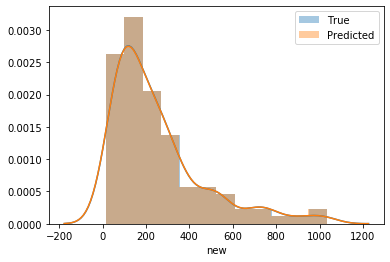

In [8]:
sns.distplot(Y_test, label='True')
sns.distplot(Y_pred, label='Predicted')
plt.legend();

### 'new' column is the linear function.

In [9]:
X = gold[['Open', 'High', 'Low', 'Price']][0:411]
Y = gold['Pred'][0:411]

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

R2 score of training set is 1.0
R2 score of test set is 1.0


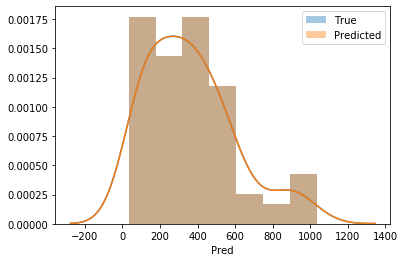

In [11]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
r2_train = r2_score(Y_train, y_train_predicted)
r2_test = r2_score(Y_test, y_test_predict)
sns.distplot(Y_test, label='True')
sns.distplot(y_test_predict, label='Predicted')
plt.legend();
print("R2 score of training set is {}".format(r2_train))
print("R2 score of test set is {}".format(r2_test))

In [12]:
gold['Pred'][411:] = poly_model.predict(poly_features.fit_transform(gold[['Open', 'High', 'Low', 'Price']][411:]))

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


R2 score of training set is 1.0
R2 score of test set is 1.0


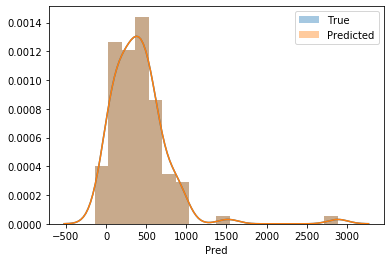

In [13]:
X = gold[['Open', 'High', 'Low', 'Price']]
Y = gold['Pred']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
r2_train = r2_score(Y_train, y_train_predicted)
r2_test = r2_score(Y_test, y_test_predict)
sns.distplot(Y_test, label='True')
sns.distplot(y_test_predict, label='Predicted')
plt.legend();
print("R2 score of training set is {}".format(r2_train))
print("R2 score of test set is {}".format(r2_test))

### 'Pred' column is the polynomial function.

# 3.2

In [14]:
tcs = pd.read_csv('TCS.csv')
tcs['Date'] = pd.to_datetime(tcs['Date'])
tcs = tcs.sort_values(by=['Date'], ascending=False)
tcs.set_index('Date', inplace=True)
nifty = pd.read_csv('Nifty50.csv')
nifty['Date'] = pd.to_datetime(nifty['Date'])
nifty = nifty.sort_values(by=['Date'], ascending=False)
nifty.set_index('Date', inplace=True)

In [15]:
return_tcs = tcs['Close Price'].pct_change()[:91]
return_tcs = return_tcs.fillna(0)
return_nifty = nifty['Close'].pct_change()[:91]
return_nifty = return_nifty.fillna(0)

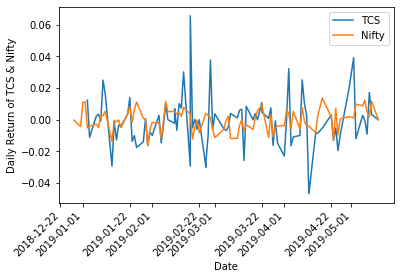

In [16]:
plt.figure()
return_tcs.plot(label='TCS')
return_nifty.plot(label='Nifty')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Daily Return of TCS & Nifty')
plt.xticks(rotation=45)
plt.show()

In [17]:
X = return_nifty.values
Y = return_tcs.values
def linreg(x,y):
    x=sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    print(model.summary())
    x = x[:, 1]
    return model.params[0], model.params[1]
alpha, beta = linreg(X,Y)
print('alpha: ', str(alpha))
print('beta: ', str(beta))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.624
Date:                Wed, 17 Jun 2020   Prob (F-statistic):              0.109
Time:                        18:07:38   Log-Likelihood:                 248.42
No. Observations:                  91   AIC:                            -492.8
Df Residuals:                      89   BIC:                            -487.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.002     -0.607      0.5

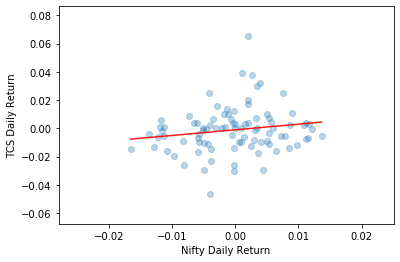

In [18]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2*beta + alpha
plt.figure()
plt.scatter(X, Y, alpha=0.3)
plt.xlabel("Nifty Daily Return")
plt.ylabel("TCS Daily Return")
plt.plot(X2, Y_hat, 'r', alpha=0.9)
plt.show()

In [19]:
tcs['month'] = tcs.index.month
tcs['year'] = tcs.index.year
t_group = tcs.groupby(['year', 'month'])
nifty['month'] = nifty.index.month
nifty['year'] = nifty.index.year
n_group = nifty.groupby(['year', 'month'])
n_group.first()

Open      High       Low     Close  Shares Traded  \
year month                                                          
2017 5       9636.55   9649.60   9609.25   9621.25      427053433   
     6       9478.50   9535.80   9448.75   9520.90      185202600   
     7      10034.70  10085.90  10016.95  10077.10      245096535   
     8       9905.70   9925.10   9856.95   9917.90      337782004   
     9       9814.30   9854.00   9775.35   9788.60      202350211   
     10     10364.90  10367.70  10323.95  10335.30      239809700   
     11     10332.70  10332.70  10211.25  10226.55      353105240   
     12     10492.35  10538.70  10488.65  10530.70      156736221   
2018 1      11018.80  11058.50  10979.30  11027.70      253462573   
     2      10488.95  10535.50  10461.55  10492.85      294794221   
     3      10143.60  10158.35  10096.90  10113.70      354977198   
     4      10705.75  10759.00  10704.60  10739.35      179163468   
     5      10670.10  10763.80  10620.40  10736.15      629198569   
     6      10612.85  10723.05  10612.35  10714.30      250327878   
     7      11311.05  11366.00  11267.75  11356.50      264430889   
     8      11675.85  11727.65  11640.10  11680.50      357230312   
     9      11008.10  11034.10  10850.30  10930.45      492894147   
     10     10209.55  10396.00  10105.10  10386.60      386618948   
     11     10892.10  10922.45  10835.10  10876.75      467857329   
     12     10913.20  10923.55  10853.20  10862.55      186494657   
2019 1      10690.55  10838.05  10678.55  10830.95      604818027   
     2      10865.70  10865.70  10784.85  10792.50      644159018   
     3      11625.45  11630.35  11570.15  11623.90      416276981   
     4      11748.75  11756.25  11655.90  11748.15      532630874   
     5      11258.70  11300.20  11125.60  11148.20      357586433   

            Turnover (Rs. Cr)  
year month                     
2017 5               19605.94  
     6                8783.59  
     7               13131.89  
     8               14619.43  
     9               11087.11  
     10              12830.06  
     11              19005.56  
     12               8943.10  
2018 1               14459.69  
     2               16299.11  
     3               18807.48  
     4               10412.57  
     5               29479.77  
     6               14440.17  
     7               15297.40  
     8               20755.73  
     9               23227.86  
     10              21513.85  
     11              19964.33  
     12              10176.13  
2019 1               27471.18  
     2               27123.34  
     3               20515.25  
     4               23324.98  
     5               16722.91

In [20]:
tcs_monthly = pd.DataFrame(list(t_group['Close Price'].first()), columns=['TCS Close Price'])
nifty_monthly = pd.DataFrame(list(n_group['Close'].first()), columns=['Nifty Close Price'])
monthly_prices = pd.concat([tcs_monthly['TCS Close Price'], nifty_monthly['Nifty Close Price']], axis=1)
monthly_prices = monthly_prices.pct_change().fillna(0)
monthly_prices

,TCS Close Price,Nifty Close Price
0,0.000000,0.000000
1,-0.072351,-0.010430
2,0.054797,0.058419
3,0.001826,-0.015798
4,-0.024195,-0.013037
5,0.077198,0.055851
6,0.004954,-0.010522
7,0.024346,0.029741
8,0.152210,0.047195
9,-0.024837,-0.048501


In [21]:
X = monthly_prices['Nifty Close Price'].values
Y = monthly_prices['TCS Close Price'].values
alpha, beta = linreg(X,Y)
print('alpha: ', str(alpha))
print('beta: ', str(beta))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     3.763
Date:                Wed, 17 Jun 2020   Prob (F-statistic):             0.0648
Time:                        18:07:38   Log-Likelihood:                 17.804
No. Observations:                  25   AIC:                            -31.61
Df Residuals:                      23   BIC:                            -29.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0045      0.025     -0.178      0.8

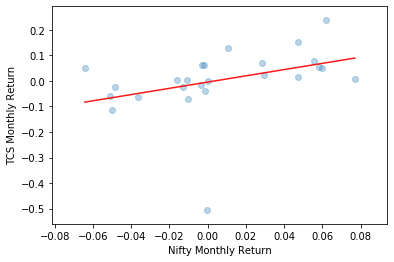

In [22]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2*beta + alpha
plt.figure()
plt.scatter(X, Y, alpha=0.3)
plt.xlabel("Nifty Monthly Return")
plt.ylabel("TCS Monthly Return")
plt.plot(X2, Y_hat, 'r', alpha=0.9)
plt.show()

## Inferences

As we can see that the beta value for daily returns for TCS is less than 1, hence it indicates that the stock has lower volatility. On the other hand, the beta value for monthly returns for TCS is more than 1, indicating that the stock is more volatile than broader market. Therefore, it may have high return.
For negative beta value, the stock price of TCS will depriciate with corresponing increase in the Nifty stock ptice, and vice-versa.
The regression plot helps us decide whether the slope (beta value) is postive or negative and the rate at which it varies with the Nifty stock.